In [29]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [91]:
BTC=yf.download('BTC-USD',start='2024-06-13',end='2024-06-14', interval='1m')

[*********************100%%**********************]  1 of 1 completed


In [92]:
LTC=yf.download('LTC-USD',start='2024-06-13',end='2024-06-14', interval='1m')

[*********************100%%**********************]  1 of 1 completed


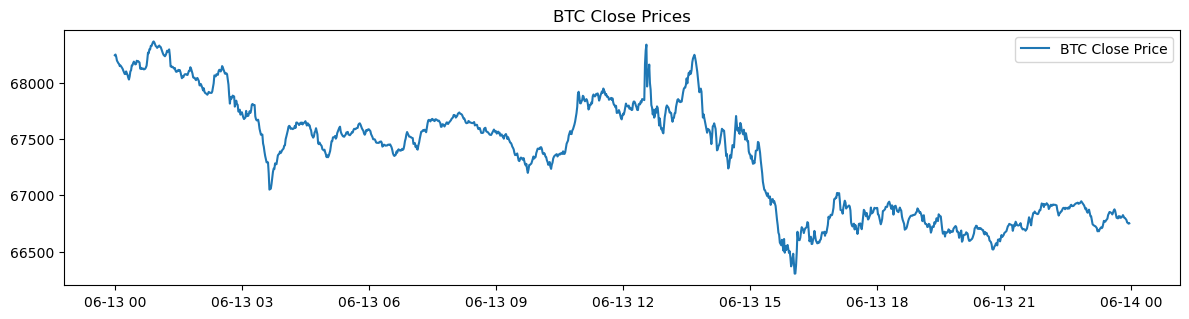

In [94]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(BTC.index, BTC['Close'], label='BTC Close Price')
plt.title('BTC Close Prices')
plt.legend()
plt.tight_layout()


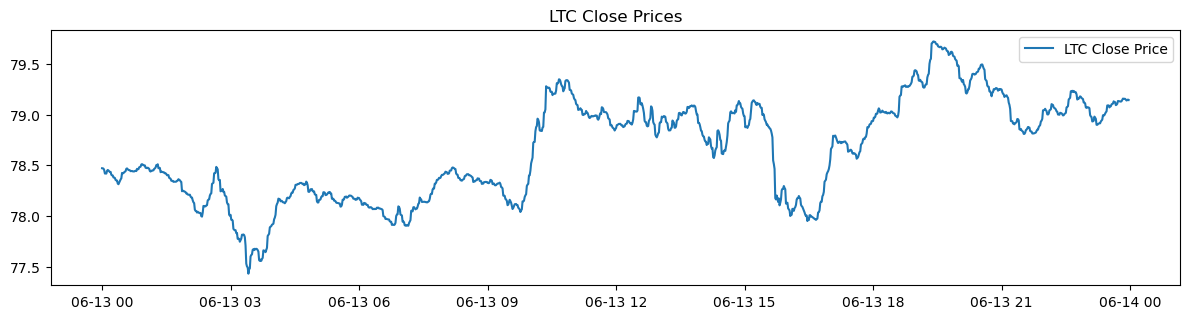

In [95]:
plt.show()
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 2)
plt.plot(LTC.index, LTC['Close'], label='LTC Close Price')
plt.title('LTC Close Prices')
plt.legend()
plt.tight_layout()
plt.show()

In [96]:
S1_0 = BTC['Open'][0]
S2_0 = LTC['Open'][0]
r1=np.log(BTC['Adj Close']/BTC['Adj Close'].shift(1))
r2=np.log(LTC['Adj Close']/LTC['Adj Close'].shift(1))

In [97]:
mu_1 = r1.mean()*1278
mu_2 = r2.mean()*1278

In [98]:
sigma_1 = r1.std()*np.sqrt(1278)
sigma_2 = r2.std()*np.sqrt(1278)

In [99]:
z_0 = 0

In [100]:
from scipy.stats import linregress

In [101]:
min_size = min(len(np.log(BTC['Adj Close'])), len(np.log(LTC['Adj Close'])))
result = linregress(np.log(BTC['Adj Close'][:min_size]), np.log(LTC['Adj Close'][:min_size]))

In [102]:
beta=result.slope

In [103]:
gamma = 0.5

In [104]:
delta=1

In [105]:
rho=r1.corr(r2)

In [106]:
T=1
M=len(BTC['Adj Close'])

In [107]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = S1[t-1] * np.exp((mu_1 + delta * z[t] - sigma_1 ** 2 / 2) * dt + sigma_1 * np.sqrt(dt) * rn1[t])
    S2[t] = S2[t-1] * np.exp((mu_2 - sigma_2 ** 2 / 2) * dt + sigma_2 * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2) * rn2[t]))

Text(0.5, 1.0, 'Price')

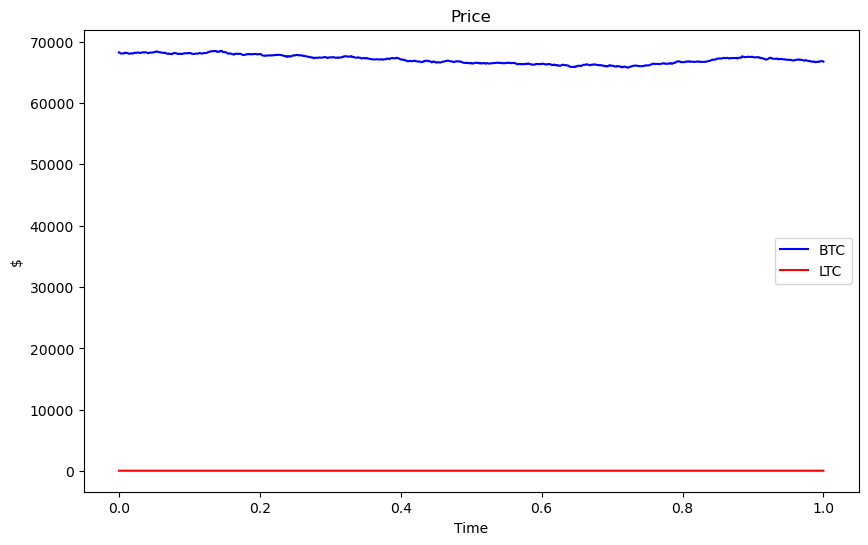

In [109]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='BTC')
plt.plot(tt, S2, 'r', lw=1.5, label='LTC')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Price')

Text(0.5, 1.0, 'z')

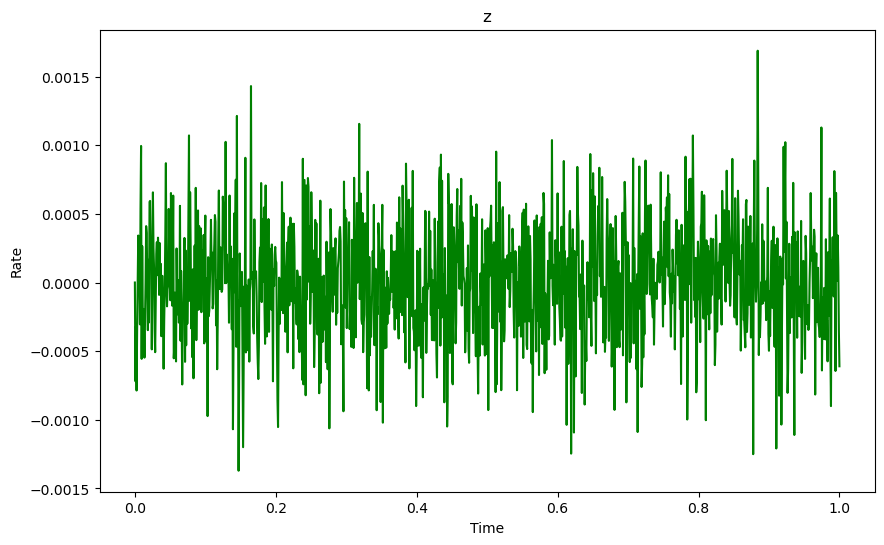

In [110]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [111]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

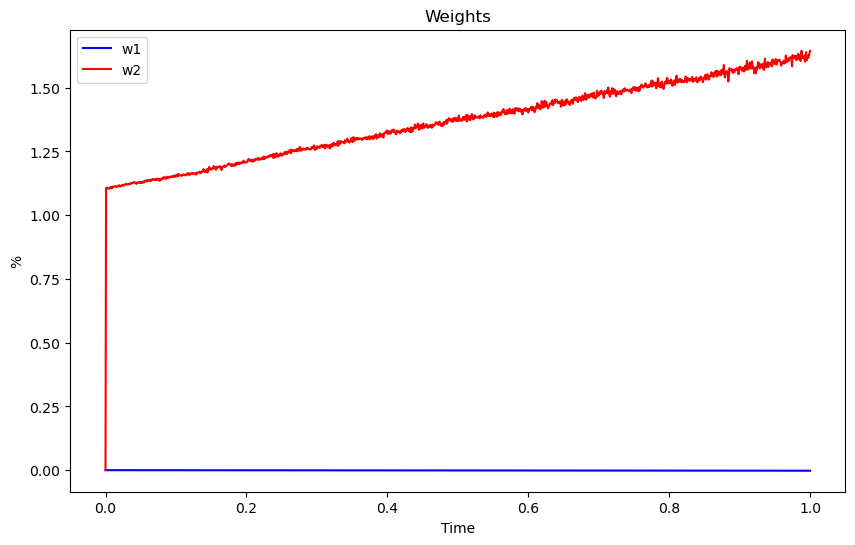

In [112]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

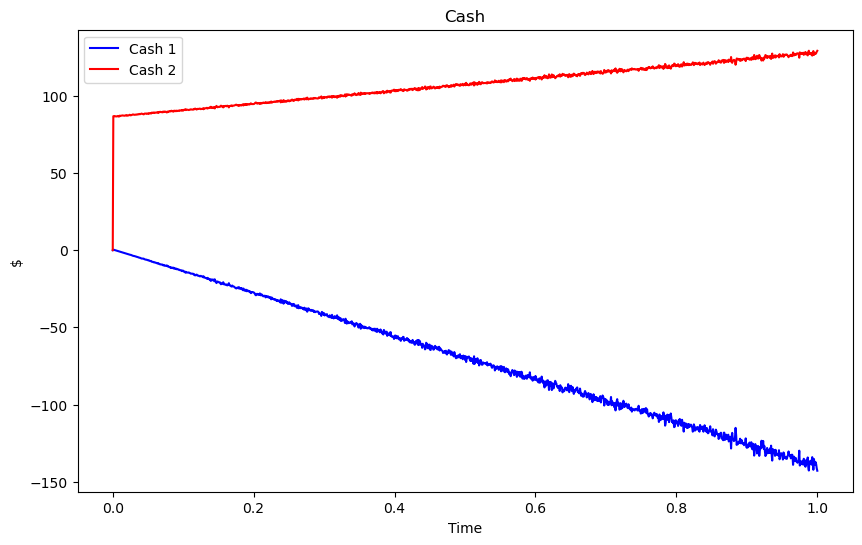

In [113]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Cash 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Cash 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

Text(0.5, 1.0, 'Comparison')

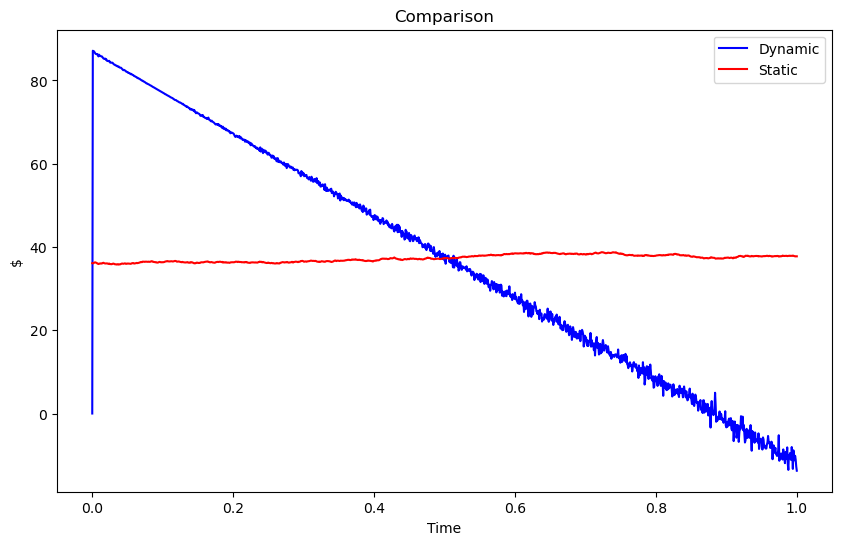

In [114]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

In [115]:
np.random.seed(0)
simulated_BTC = S1_0 * np.exp((mu_1 - 0.5 * sigma_1**2) * tt + sigma_1 * np.random.standard_normal(M + 1))
simulated_LTC = S2_0 * np.exp((mu_2 - 0.5 * sigma_2**2) * tt + sigma_2 * np.random.standard_normal(M + 1))

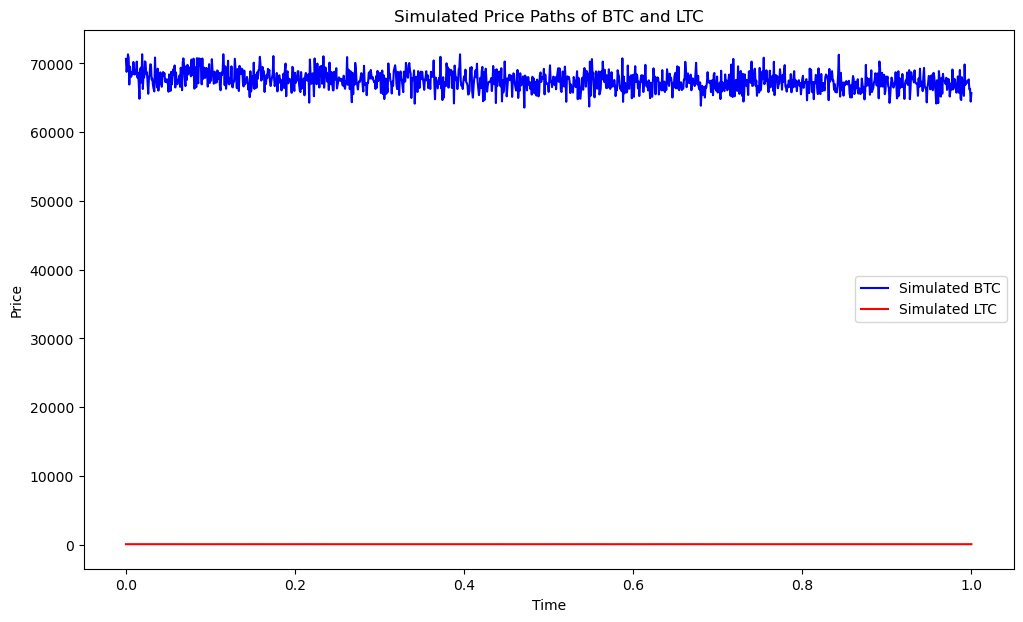

In [116]:
plt.figure(figsize=(12, 7))
plt.plot(tt, simulated_BTC, 'b', label='Simulated BTC')
plt.plot(tt, simulated_LTC, 'r', label='Simulated LTC')
plt.title('Simulated Price Paths of BTC and LTC')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()